In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading in the data

In [3]:
train = pd.read_excel('train_final.xlsx')

In [4]:
train.drop(labels='Unnamed: 0',axis=1, inplace=True)

### Checking for nulls

In [5]:
train.isnull().apply(sum)

school_state                                    0
project_grade_category                          0
project_subject_categories                      0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
                                               ..
resource_text_work                              0
gender                                          0
Project_SubCategory_1                           0
Project_SubCategory_2                           0
Project_SubCategory_3                           0
Length: 64, dtype: int64

### Checking for outliers in the numerical column

In [6]:
train['teacher_number_of_previously_posted_projects'].describe()

count    182080.000000
mean         11.237055
std          28.016086
min           0.000000
25%           0.000000
50%           2.000000
75%           9.000000
max         451.000000
Name: teacher_number_of_previously_posted_projects, dtype: float64

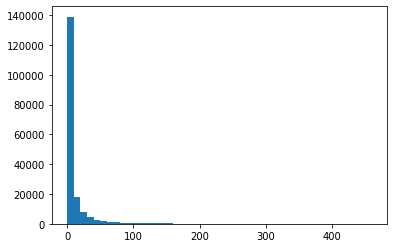

In [7]:
plt.hist(train['teacher_number_of_previously_posted_projects'], bins=range(min(train['teacher_number_of_previously_posted_projects']), max(train['teacher_number_of_previously_posted_projects']) + 10, 10))
plt.show()

In [8]:
# gender = {'Mr.':'Male', 'Mrs.':'Female', 'Ms.':'Female'}
# train['gender'] = train['teacher_prefix'].map(gender)

In [9]:
# train['gender'].fillna('Not Provided', inplace=True)

### Importing packages


In [10]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scikitplot.metrics import plot_lift_curve
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, roc_curve, auc, r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model, neighbors
from sklearn.naive_bayes import GaussianNB
from dtreeviz.trees import *
from sklearn.preprocessing import LabelEncoder
from sklearn import svm

### Treating the columns and making a dataset out of required columns

In [11]:
train.columns

Index(['school_state', 'project_grade_category', 'project_subject_categories',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'items', 'quantity', 'price', 'total_price', 'min_quantity',
       'min_price', 'min_total_price', 'max_quantity', 'max_price',
       'max_total_price', 'mean_quantity', 'mean_price', 'mean_total_price',
       'Year', 'Month', 'Weekday', 'Hour', 'Month_Day', 'Year_Day',
       'essay1_len', 'essay2_len', 'essay3_len', 'essay4_len', 'title_len',
       'char_count', 'word_count', 'word_density', 'punctuation_count',
       'title_word_count', 'upper_case_word_count', 'stopword_count',
       'polarity', 'subjectivity', 'title_polarity', 'title_subjectivity',
       'article_text_classroom', 'article_text_help', 'article_text_learn',
       'article_text_learning', 'article_text_need', 'article_text_reading',
       'article_text_school', 'article_text_students', 'article_text_use',
       'article_text_work', 'resource_tex

In [12]:
pd.set_option('display.max_columns',500)
train.head()

,school_state,project_grade_category,project_subject_categories,teacher_number_of_previously_posted_projects,project_is_approved,items,quantity,price,total_price,min_quantity,min_price,min_total_price,max_quantity,max_price,max_total_price,mean_quantity,mean_price,mean_total_price,Year,Month,Weekday,Hour,Month_Day,Year_Day,essay1_len,essay2_len,essay3_len,essay4_len,title_len,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,stopword_count,polarity,subjectivity,title_polarity,title_subjectivity,article_text_classroom,article_text_help,article_text_learn,article_text_learning,article_text_need,article_text_reading,article_text_school,article_text_students,article_text_use,article_text_work,resource_text_classroom,resource_text_help,resource_text_learn,resource_text_learning,resource_text_need,resource_text_reading,resource_text_school,resource_text_students,resource_text_use,resource_text_work,gender,Project_SubCategory_1,Project_SubCategory_2,Project_SubCategory_3
0,33,3,24,26,1,2,6,299.98,899.94,3,149.99,449.97,3,149.99,449.97,3.0,149.990,449.970,2016,11,4,14,18,323,967,805,0,0,24,1775,312,5.670927,40,21,5,151,0.213402,0.391136,0.333333,0.666667,0.000000,0.150877,0.290453,0.000000,0.165534,0.208328,0.346046,0.801055,0.177267,0.170913,0.000000,0.150877,0.290453,0.000000,0.165534,0.208328,0.346046,0.801055,0.177267,0.170913,0,16,-1,-1
1,10,0,42,1,0,1,20,20.00,400.00,20,20.00,400.00,20,20.00,400.00,20.0,20.000,400.000,2017,4,2,15,26,116,587,639,0,0,22,1229,190,6.434555,38,15,3,79,0.192889,0.597111,0.300000,0.750000,0.000000,0.210075,0.000000,0.000000,0.000000,0.000000,0.803034,0.557678,0.000000,0.000000,0.000000,0.210075,0.000000,0.000000,0.000000,0.000000,0.803034,0.557678,0.000000,0.000000,0,23,26,-1
2,44,0,36,5,1,1,1,469.99,469.99,1,469.99,469.99,1,469.99,469.99,1.0,469.990,469.990,2017,1,6,22,1,1,761,546,0,0,21,1310,234,5.574468,26,26,4,103,0.353888,0.534450,0.000000,0.000000,0.075981,0.746628,0.159703,0.000000,0.091018,0.000000,0.190271,0.605624,0.000000,0.000000,0.075981,0.746628,0.159703,0.000000,0.091018,0.000000,0.190271,0.605624,0.000000,0.000000,0,0,17,-1
3,27,0,8,16,0,5,5,684.47,684.47,1,18.95,18.95,1,354.99,354.99,1.0,136.894,136.894,2016,8,4,15,12,225,1201,1209,0,0,72,2413,386,6.235142,77,31,4,188,0.175880,0.416224,0.500000,0.500000,0.000000,0.165417,0.000000,0.148435,0.181486,0.000000,0.695556,0.658688,0.000000,0.000000,0.000000,0.165417,0.000000,0.148435,0.181486,0.000000,0.695556,0.658688,0.000000,0.000000,1,14,-1,-1
4,4,1,8,42,1,1,2,355.50,711.00,2,355.50,711.00,2,355.50,711.00,2.0,355.500,711.000,2016,8,5,9,6,219,451,556,0,0,48,1010,185,5.430108,15,13,0,98,0.285417,0.557192,0.183333,0.350000,0.218182,0.000000,0.229298,0.000000,0.000000,0.000000,0.000000,0.948588,0.000000,0.000000,0.218182,0.000000,0.229298,0.000000,0.000000,0.000000,0.000000,0.948588,0.000000,0.000000,1,14,-1,-1


In [13]:
x_cols = ['school_state', 'project_grade_category', 'project_subject_categories',
       'teacher_number_of_previously_posted_projects',
       'items', 'quantity', 'price', 'total_price', 'min_quantity',
       'min_price', 'min_total_price', 'max_quantity', 'max_price',
       'max_total_price', 'mean_quantity', 'mean_price', 'mean_total_price',
       'Year', 'Month', 'Weekday', 'Hour', 'Month_Day', 'Year_Day',
       'essay1_len', 'essay2_len', 'essay3_len', 'essay4_len', 'title_len',
       'char_count', 'word_count', 'word_density', 'punctuation_count',
       'title_word_count', 'upper_case_word_count', 'stopword_count',
       'polarity', 'subjectivity', 'title_polarity', 'title_subjectivity',
       'article_text_classroom', 'article_text_help', 'article_text_learn',
       'article_text_learning', 'article_text_need', 'article_text_reading',
       'article_text_school', 'article_text_students', 'article_text_use',
       'article_text_work', 'resource_text_classroom', 'resource_text_help',
       'resource_text_learn', 'resource_text_learning', 'resource_text_need',
       'resource_text_reading', 'resource_text_school',
       'resource_text_students', 'resource_text_use', 'resource_text_work',
       'gender', 'Project_SubCategory_1', 'Project_SubCategory_2',
       'Project_SubCategory_3']

y_cols = ['project_is_approved']

In [14]:
x_all = train[x_cols]
y_all = train[y_cols]

In [15]:
## Dataset dimensions
n_obsv, n_feat = x_all.shape

print('The number of observations is ', n_obsv)
print('The number of features is ', n_feat)
print('\n')

# features = names[0:len(names)-1]
# target = names[len(names)-1]
print('The features of the dataset are: ', x_all.columns)
print('\n')
print('The target variable of the dataset is:', y_cols[0])

The number of observations is  182080
The number of features is  63


The features of the dataset are:  Index(['school_state', 'project_grade_category', 'project_subject_categories',
       'teacher_number_of_previously_posted_projects', 'items', 'quantity',
       'price', 'total_price', 'min_quantity', 'min_price', 'min_total_price',
       'max_quantity', 'max_price', 'max_total_price', 'mean_quantity',
       'mean_price', 'mean_total_price', 'Year', 'Month', 'Weekday', 'Hour',
       'Month_Day', 'Year_Day', 'essay1_len', 'essay2_len', 'essay3_len',
       'essay4_len', 'title_len', 'char_count', 'word_count', 'word_density',
       'punctuation_count', 'title_word_count', 'upper_case_word_count',
       'stopword_count', 'polarity', 'subjectivity', 'title_polarity',
       'title_subjectivity', 'article_text_classroom', 'article_text_help',
       'article_text_learn', 'article_text_learning', 'article_text_need',
       'article_text_reading', 'article_text_school', 'article_tex

In [16]:
# x_numeric = x_all['teacher_number_of_previously_posted_projects']
# x_cat = x_all.drop(['teacher_number_of_previously_posted_projects'], axis = 1)

In [17]:
# x_cat_ohe = pd.get_dummies(x_cat)
# x_all = pd.concat([x_cat_ohe, x_numeric], axis=1)

# ## Splitting data into train and test sets (using all features label encoded)
# X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size = 0.2, random_state=1)

In [18]:
# # Import label encoder 
# from sklearn import preprocessing 
  
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# df['species']= label_encoder.fit_transform(x_cat) 

In [19]:
train_sample = train.sample(frac=0.1, random_state=1)

In [20]:
x_all_sample = train_sample[x_cols]
y_all_sample = train_sample[y_cols]

In [54]:
# ## Splitting data into train and test sets (using all features label encoded)
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(x_all_sample, y_all_sample, test_size = 0.2, random_state=1)

In [23]:
y_all_sample['project_is_approved'].value_counts()

1    15495
0     2713
Name: project_is_approved, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE

In [55]:
sm = SMOTE(random_state=12, ratio = 0.7, k_neighbors=3)
x_res, y_res = sm.fit_sample(X_train_sample, y_train_sample)
print(np.bincount(y_res))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 8691 12417]


### Building SVM classifier

In [20]:
hyper_parameters = {'kernel': ['rbf', 'linear'], 'gamma': [0.1, 0.5, 1], 'C': [1, 10, 50]}

In [ ]:
import warnings
warnings.simplefilter('ignore')

print('Finding best parameters for f1')
clf = RandomizedSearchCV(svm.SVC(), hyper_parameters, cv=5,
                   scoring='f1', n_jobs=-1)
clf.fit(X_train_sample, y_train_sample)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

Finding best parameters for f1


In [50]:
clf = svm.SVC(kernel='rbf', gamma=0.1, C=50)
clf = clf.fit(x_res, y_res)

In [62]:
y_pred = clf.predict(X_test_sample)

3642

In [63]:
print(classification_report(y_test_sample, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       564
           1       0.85      1.00      0.92      3078

    accuracy                           0.85      3642
   macro avg       0.42      0.50      0.46      3642
weighted avg       0.71      0.85      0.77      3642



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Building ensembles

### Building bags of KNN classifiers and running grid-search

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_params = {'n_neighbors':list(range(5,16)), 'weights':['uniform','distance']}

In [ ]:
clf_knn = KNeighborsClassifier()
# clf_lr = linear_model.LogisticRegression()

In [ ]:
model_bag = RandomizedSearchCV(BaggingClassifier(base_estimator=clf_knn, n_estimators=10, max_samples=0.7),
                        param_grid=knn_params, cv=5, n_jobs=-1, scoring='f1')

model_bag.fit(X_train_sample,y_train_sample)
print("Best parameters set found on development set:")
print()
print(model_bag.best_params_)
print()

### Building Decision tree classifier with ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassfier

In [ ]:
dtc_params = {'max_depth':[5,10,15], 'min_samples_leaf':[15,20,25,30]}
dtc = DecisionTreeClassifier()

In [ ]:
abc = RandomizedSearchCV(AdaBoostClassifier(n_estimators = 30, base_estimator = dtc, learning_rate = 0.7), \
                         param_grid = dtc_params, cv=5,n_jobs=-1,scoring='f1')
abc.fit(x_res, y_res)
print("Best parameters set found :")
print()
print(model_bag.best_params_)
print()

## Lauren's codes

In [31]:
from sklearn import tree, linear_model, neighbors, datasets, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

In [48]:
def decision_tree(xTrain,yTrain,xTest,yTest):
    # Define decision tree
    tree_clf = tree.DecisionTreeClassifier()
    p_grid = dict(max_depth = list(range(10,21,5)), min_samples_leaf=list(range(30,36,5)),criterion = ["entropy"])
    
    # Arrays to store scores - 10 is the number of random trials in
    # the cross validation
    non_nested_scores = np.zeros(10)
    nested_scores = np.zeros(10)
    
    # Loop for each trial
    for trial in range(10):
        # Choose cross-validation techniques for the inner and outer loops
        # independently of the dataset.
        # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
        inner_cv = KFold(n_splits = 4, shuffle = True, random_state = trial)
        outer_cv = KFold(n_splits = 4, shuffle = True, random_state = trial)
        # Non_nested parameter search and scoring
        clf = GridSearchCV(estimator = tree_clf, param_grid = p_grid, cv = inner_cv)
        clf.fit(xTrain, yTrain)
        non_nested_scores[trial] = clf.best_score_
        # Nested CV with parameter optimization
        nested_score = cross_val_score(clf, X=xTrain, y=yTrain, cv=outer_cv)
        nested_scores[trial] = nested_score.mean()
    
    score_difference = non_nested_scores - nested_scores
    print("Average difference of {0:6f} with std. dev. of {1:6f}.".format(score_difference.mean(), score_difference.std()))
    
    print(clf.best_score_) # the best accuracy score amongst all the possible models
    print(clf.best_params_) # this helps to show which specific set of parameters were chosen as the best model
    print(clf.best_estimator_) # this helps to get the best estimator 

    #Predict the response for test dataset
    y_pred = clf.predict(xTest)
    fpr, tpr, thresholds = metrics.roc_curve(yTest, y_pred, pos_label=1)
    print("The AUC is:", metrics.auc(fpr, tpr))
    return

'''
The code below is for K - Nearest Neighbors
'''
def KNN(xTrain,yTrain,xTest,yTest):
    # Define KNN
    knn_clf = KNeighborsClassifier()
    p_grid = dict(n_neighbors = list(range(1,31)), weights = ["uniform", "distance"])
    
    # Arrays to store scores - 10 is the number of random trials in
    # the cross validation
    non_nested_scores = np.zeros(10)
    nested_scores = np.zeros(10)
    
    # Loop for each trial
    for trial in range(10):
        # Choose cross-validation techniques for the inner and outer loops,
        # independently of the dataset.
        # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
        inner_cv = KFold(n_splits = 4, shuffle = True, random_state = trial)
        outer_cv = KFold(n_splits = 4, shuffle = True, random_state = trial)
        # Non_nested parameter search and scoring
        clf = GridSearchCV(estimator = knn_clf, param_grid = p_grid, cv = inner_cv)
        clf.fit(xTrain, yTrain)
        non_nested_scores[trial] = clf.best_score_
        # Nested CV with parameter optimization
        nested_score = cross_val_score(clf, X=xTrain, y=yTrain, cv=outer_cv)
        nested_scores[trial] = nested_score.mean()
    
    score_difference = non_nested_scores - nested_scores
    print("Average difference of {0:6f} with std. dev. of {1:6f}.".format(score_difference.mean(), score_difference.std()))
    
    print(clf.best_score_) # the best accuracy score amongst all the possible models
    print(clf.best_params_) # this helps to show which specific set of parameters were chosen as the best model
    print(clf.best_estimator_) # this helps to get the best estimator 
    
    #Predict the response for test dataset
    y_pred = clf.predict(xTest)
    fpr, tpr, thresholds = metrics.roc_curve(yTest, y_pred, pos_label=2)
    print("The AUC is:", metrics.auc(fpr, tpr))
    return

'''
The code below is for logistic regression
'''
def log_reg(xTrain,yTrain,xTest,yTest):
    # Define logit
    logit_clf = linear_model.LogisticRegression()
    p_grid = dict(C = [0.001, 0.01, 0.1, 1, 10], penalty = ["l1" or "l2"])
    
    # Arrays to store scores - 10 is the number of random trials in
    # the cross validation
    non_nested_scores = np.zeros(10)
    nested_scores = np.zeros(10)
    
    # Loop for each trial
    for trial in range(10):
        # Choose cross-validation techniques for the inner and outer loops,
        # independently of the dataset.
        # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
        inner_cv = KFold(n_splits = 4, shuffle = True, random_state = trial)
        outer_cv = KFold(n_splits = 4, shuffle = True, random_state = trial)
        # Non_nested parameter search and scoring
        clf = GridSearchCV(estimator = logit_clf, param_grid = p_grid, cv = inner_cv)
        clf.fit(xTrain, yTrain)
        non_nested_scores[trial] = clf.best_score_
        # Nested CV with parameter optimization
        nested_score = cross_val_score(clf, X=xTrain, y=yTrain, cv=outer_cv)
        nested_scores[trial] = nested_score.mean()
    
    score_difference = non_nested_scores - nested_scores
    print("Average difference of {0:6f} with std. dev. of {1:6f}.".format(score_difference.mean(), score_difference.std()))
    
    print(clf.best_score_) # the best accuracy score amongst all the possible models
    print(clf.best_params_) # this helps to show which specific set of parameters were chosen as the best model
    print(clf.best_estimator_) # this helps to get the best estimator
    
    #Predict the response for test dataset
    y_pred = clf.predict(xTest)
    fpr, tpr, thresholds = metrics.roc_curve(yTest, y_pred, pos_label=2)
    print("The AUC is:", metrics.auc(fpr, tpr))
    return

'''
The code below is for Naive Bayes
'''
def NB(xTrain,yTrain,xTest,yTest):
    #Create a Gaussian Classifier
    clf = GaussianNB()  
    clf.fit(xTrain, yTrain)        
    
    #Predict the response for test dataset
    y_pred = clf.predict(xTest)
    fpr, tpr, thresholds = metrics.roc_curve(yTest, y_pred, pos_label=2)
    print("The AUC is:", metrics.auc(fpr, tpr))
    return

In [49]:
decision_tree(x_res, y_res, X_test_sample, y_test_sample)

Average difference of 0.001199 with std. dev. of 0.001621.
0.8180784536668562
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 30}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
The AUC is: 0.5449138014460896


In [ ]:
KNN(xTrain,yTrain,xTest,yTest)

In [ ]:
log_reg(xTrain,yTrain,xTest,yTest)

In [ ]:
NB(xTrain,yTrain,xTest,yTest)